In [11]:
import pandas as pd
import seaborn as sns
import os
from LigPrepper import pdbqt2sdf

def extract_vina_scores(pdbqt_file):
    vina_scores = []

    with open(pdbqt_file, 'r') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith("REMARK VINA RESULT:"):
            fields = line.split()
            if len(fields) >= 4:
                vina_scores.append(float(fields[3]))

    return vina_scores

def extract_vina_rmsd(pdbqt_file):
    vina_RMSDs = []

    with open(pdbqt_file, 'r') as file:
        lines = file.readlines()

    for line in lines:
        if line.startswith("REMARK VINA RESULT:"):
            fields = line.split()
            if len(fields) >= 6:
                vina_RMSDs.append(float(fields[5]))

    return vina_RMSDs



def split_pdbqt(pdbqt_file):
    with open(pdbqt_file, 'r') as f:
        lines = f.readlines()
    name=pdbqt_file[:-6]
    pose_separator = "MODEL"
    current_structure = []
    structure_count = 0

    for line in lines:
        if line.startswith(pose_separator):
            if current_structure:
                # Save the current structure to a separate file
                output_filename = f"{name}_pose_{structure_count}.pdbqt"
                with open(output_filename, 'w') as output_file:
                    output_file.writelines(current_structure)
                current_structure = []
                structure_count += 1
        current_structure.append(line)

    # Save the last structure
    if current_structure:
        output_filename = f"structure_{structure_count}.pdbqt"
        with open(output_filename, 'w') as output_file:
            output_file.writelines(current_structure)



In [10]:
pdbqt_file = '7KK4_A45_B145-AdS12_vina_out.pdbqt'  
plot_title='4TVJ_A45_B145-En'

pdbqt_file[:-6]

'7KK4_A45_B145-AdS12_vina_out'

Split the pdbqt output from vina into seperate files

In [12]:

split_pdbqt(pdbqt_file)


Convert a pdbqt file to sdf

In [14]:
pdbqt2sdf('7KK4_A45_B145-AdS12_vina_out_pose_0.pdbqt')

'7KK4_A45_B145-AdS12_vina_out_pose_0.sdf'

[Text(0.5, 1.0, '4TVJ_A45_B145-En_Score')]

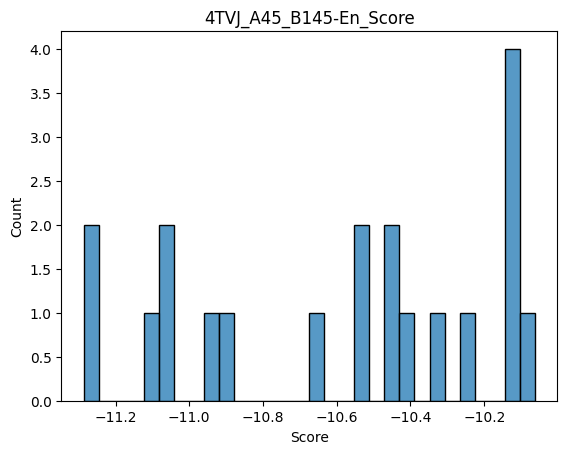

In [35]:

vina_scores = extract_vina_scores(pdbqt_file)
score_range=vina_scores[0]-vina_scores[-1]

pose_list=[]
for i, score in enumerate(vina_scores, start=1):
            pose_list.append(f"Pose {i}")

score_df=pd.DataFrame()

score_df["Pose"]=pose_list
score_df["Score"]=vina_scores

sns.histplot(data=score_df, x="Score", bins=30).set(title=plot_title+'_Score')


[Text(0.5, 1.0, '4TVJ_A45_B145-En_RMSD')]

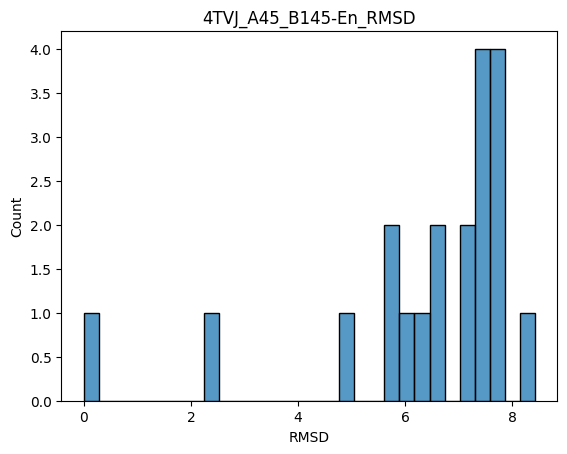

In [36]:
vina_rmsd = extract_vina_rmsd(pdbqt_file)
score_range=vina_scores[0]-vina_scores[-1]

pose_list=[]
for i, score in enumerate(vina_rmsd, start=1):
            pose_list.append(f"Pose {i}")

rmsd_df=pd.DataFrame()

rmsd_df["Pose"]=pose_list
rmsd_df["RMSD"]=vina_rmsd

sns.histplot(data=rmsd_df, x="RMSD", bins=30).set(title=plot_title+'_RMSD')


In [1]:
if __name__ == "__main__":
    pdbqt_file = '4TVJ_A45_B299-Me-Ex32-GB2_vina_out.pdbqt'  
    vina_scores = extract_vina_scores(pdbqt_file)

    if vina_scores:
        print("Vina Docking Scores:")
        for i, score in enumerate(vina_scores, start=1):
            print(f"Pose {i}: {score}")
    else:
        print("No Vina Docking Scores found in the PDBQT file.")

Vina Docking Scores:
Pose 1: -11.254
Pose 2: -11.043
Pose 3: -11.015
Pose 4: -10.739
Pose 5: -10.701
Pose 6: -10.585
Pose 7: -10.487
Pose 8: -10.484
Pose 9: -10.479
Pose 10: -10.355
Pose 11: -10.326
Pose 12: -10.322
Pose 13: -10.241
Pose 14: -10.194
Pose 15: -10.166
Pose 16: -10.162
Pose 17: -10.145
Pose 18: -10.132
Pose 19: -10.066
Pose 20: -10.056
